In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#df.isnull().sum()
#df.describe()
#df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [5]:
print("Categories in gender variables: ", end=" ")
print(df['gender'].unique())
print("Categories in race_ethnicity  variables: ", end=" ")
print(df['race_ethnicity'].unique())
print("Categories in parental_level_of_education variables: ", end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in lunch variables: ", end=" ")
print(df['lunch'].unique())
print("Categories in test_preparation_course variables: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variables:  ['female' 'male']
Categories in race_ethnicity  variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variables:  ['standard' 'free/reduced']
Categories in test_preparation_course variables:  ['none' 'completed']


In [6]:
numeric = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numeric features are: ', numeric)
category = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categories features are: ", category)

Numeric features are:  ['math_score', 'reading_score', 'writing_score']
Categories features are:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [7]:
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [8]:
math_full_score = df[df['math_score'] == 100]['average'].count()
print('Number of students with full score in math:', math_full_score)
reading_full_score = df[df['reading_score'] == 100]['average'].count()
print('Number of students with full score in reading:', reading_full_score)

Number of students with full score in math: 7
Number of students with full score in reading: 17


In [9]:
math_less_20 = df[df['math_score'] <= 20]['average'].count()
print('Number of students less than twenty in math:', math_full_score)

Number of students less than twenty in math: 7


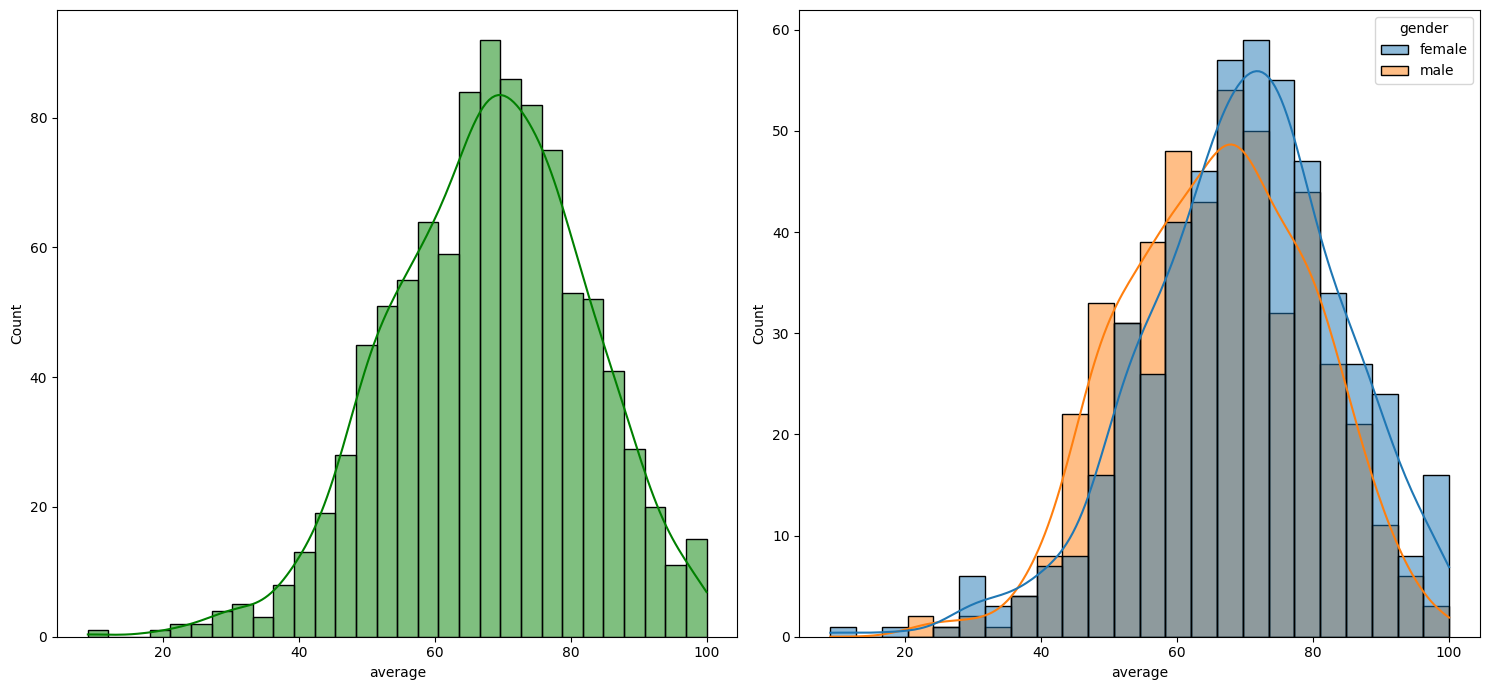

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])

# Second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor
import warnings

In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [13]:
df = df.drop(['total', 'average'], axis= 1)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
X = df.drop(['math_score'], axis= 1)
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [15]:
y = df['math_score']
y.head(2)

0    72
1    69
Name: math_score, dtype: int64

In [16]:
numeric_features = X.select_dtypes(exclude='object').columns
print('Numeric features are: ', numeric_features)
category_features = X.select_dtypes(include='object').columns
print('Categorical features are :', category_features)

Numeric features are:  Index(['reading_score', 'writing_score'], dtype='object')
Categorical features are : Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
ohe = OneHotEncoder()
ctm = ColumnTransformer(
    [
       ("OneHotEncoder", ohe, category_features),
        ("StandardSxaler", scaler, numeric_features)
    ]
)

X = ctm.fit_transform(X)
X
    


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [18]:
X.shape

(1000, 19)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)
y_test.shape

(200,)

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [21]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Xgboost": XGBRFRegressor()
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
   

    print(list(models.keys())[i])
    model_list.append((list(models.keys())[i]))

    print('Result for training set:')
    print('Model train mae:', model_train_mae)
    print('Model train mse:', model_train_mse)
    print('Model train rmse:', model_train_rmse)
    print('Model train r2:', model_train_r2)
    print('-------------------')
    print('Result for test set:')
    print('Model test mae:', model_test_mae)
    print('Model test mse:', model_test_mse)
    print('Model test rmse:', model_test_rmse)
    print('Model test r2:', model_test_r2)
    r2_list.append(model_test_r2)
    

LinearRegression
Result for training set:
Model train mae: 4.242591261490951
Model train mse: 28.42439879715139
Model train rmse: 5.331453722686843
Model train r2: 0.880557174287394
-------------------
Result for test set:
Model test mae: 4.291917272164806
Model test mse: 28.706552557380693
Model test rmse: 5.357849620638927
Model test r2: 0.8539032390585746
Ridge
Result for training set:
Model train mae: 4.242879407112199
Model train mse: 28.427025395171036
Model train rmse: 5.331700047374293
Model train r2: 0.880546136998911
-------------------
Result for test set:
Model test mae: 4.286218757180509
Model test mse: 28.65133621553025
Model test rmse: 5.352694294981757
Model test r2: 0.8541842525546834
Lasso
Result for training set:
Model train mae: 5.1617119285519735
Model train mse: 42.87732938841481
Model train rmse: 6.548078297364412
Model train r2: 0.8198241793006479
-------------------
Result for test set:
Model test mae: 4.713262108598749
Model test mse: 34.92474706660839
Model t

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['Model_name', 'R2_score']).sort_values(by = ['R2_score'], ascending= False)

,Model_name,R2_score
1,Ridge,0.854184
0,LinearRegression,0.853903
5,RandomForestRegressor,0.827760
7,Xgboost,0.826066
2,Lasso,0.822257
6,AdaBoostRegressor,0.821154
3,KNeighborsRegressor,0.793757
4,DecisionTreeRegressor,0.690646
